## Exercises 6


## Task6-1
1. **(2 points)** Study multiobjective optimization problem
$$
\begin{align}
\min & \{\|x-(1,0)\|^2,\|x-(0,1)\|^2\}\\
\text{s.t. }&x\in \mathbb R^2.
\end{align}
$$
Characterize algebraically  (i.e. give a mathematical formulation) the full set of Pareto optimal solutions.

## Solution6-1

$$
\begin{align}
f_1(x) = ||x-(1,0)||^2 >=0 \\
f_2(x) = ||x-(0,1)||^2 >=0 \\
\text{pareto optimal solution is (1,0),(0,1)} \\
\text{ the set of Pareto optimal solutions is} \\
\{ (x,1-x):x\in[0,1] \}
\end{align}
$$

## Task6-2
2. **(2 points)**
 Calculate the ideal and nadir vectors for the above bi-objective problem. You can use any method available.

## Solution6-2

### Ideal
$$
\begin{align}
\min f_1(x) \rightarrow f_1((1,0)) = 0\\
\min f_2(x) \rightarrow f_2((0,1)) = 0\\
z^{ideal} = (0,0)^T\\
\end{align}
$$

### nadir
$$
\begin{align}
\max f_1(x) \rightarrow f_1((0,1)) = 2\\
\max f_2(x) \rightarrow f_2((1,0)) = 2\\
z^{nadir} = (2,2)^T\\
\end{align}
$$

## Task6-3


3. **(2 points)** Try to generate a representative set of Pareto optimal solutions using the weighting method for the above two objective problem. Compare this set to the set of Pareto optimal solutions from task 1. What do you notice?

In [11]:
#import
import numpy as np
import ad
from scipy.optimize import minimize

### define function

In [7]:

# norm squared
def f(x):
    return [np.linalg.norm(x-(1,0))**2,np.linalg.norm(x-(0,1))**2]

x_nadir = np.array([0,1])
print( f(x_nadir))

[2.0000000000000004, 0.0]


### weighting method

In [25]:

def weighting_method(f,w):
    points = []
    start = [0,0] #starting values for the variables
    #bounds = ((-20,-20),(20,20)) #variable bounds of the problem 
    for wi in w:
        res=minimize(
            #weighted sum
            lambda x: sum(np.array(wi)*np.array(f(x))), 
            start, method='SLSQP',
            #Jacobian using automatic differentiation
            jac=ad.gh(lambda x: sum(np.array(wi)*np.array(f(x))))[0],
            #bounds given above
            #bounds = bounds,
            options = {'disp':False})
        points.append(res.x)
    return points


In [26]:
w = np.random.random((500,2)) #random weights
wn = w
# normalization
for i in range(len(w)):
    s = sum(w[i])
    for j in range(2):
        wn[i][j] = w[i][j]/s
repr_ws = weighting_method(f,wn)
print(len(repr_ws))

500


### virtualization

In [ ]:

import matplotlib.pyplot as plt
def visualize_representation(func,repr):
    f_repr_ws = [f(repri) for repri in repr]
    fig = plt.figure()
    plt.scatter([z[0] for z in f_repr_ws],[z[1] for z in f_repr_ws])
    return plt
def visualize_decisions(repr):
    fig = plt.figure()
    plt.scatter([x[0] for x in repr],[x[1] for x in repr])
    return plt


### results

<class 'list'>


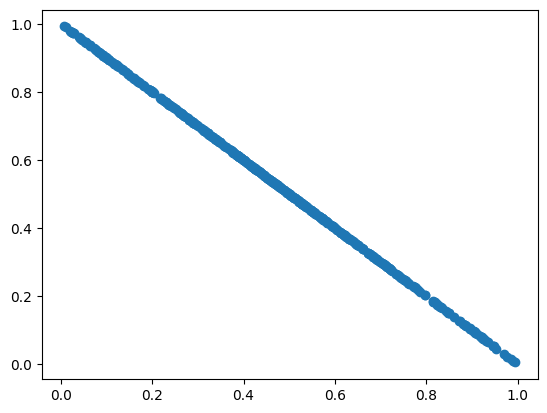

<module 'matplotlib.pyplot' from 'c:\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

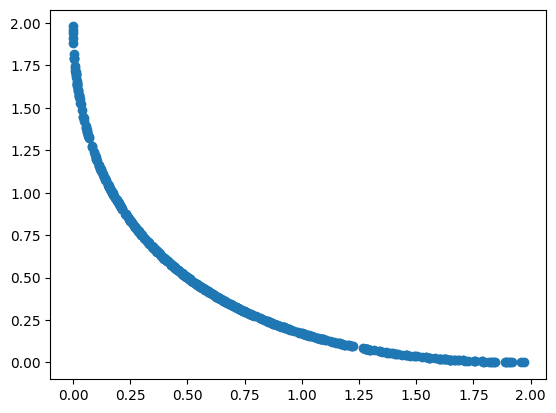

In [27]:
print(type(repr_ws))
visualize_decisions(repr_ws).show()
visualize_representation(f,repr_ws)

### What do you notice?
The weighting method can find all the Pareto optimal solutions because the objective functions are convex and the feasible set 
is convex.

## Task6-4


4. **(2 points)** Show\
  4.1. that an optimal solution to the weighting method is Pareto optimal, if the weights $w_i>0$ for all $i=1,\ldots,k$, and\
  4.2. that an optimal solution $x^*$ to the epsilon constraint method is Pareto optimal, if it is an optimal solution to the epsilon constraint method for all $j=1,\ldots,k$ and $\epsilon=f(x^*)$.

## Solution6-4

### Solution6-4-1

<i>ref: </i><br>
[1]https://pdfs.semanticscholar.org/0bd0/8c5bb8ee851d5ad0ca8d4a8eb820d007409f.pdf\
[2]Makela and Neittaanmaki (1992, p. 39) and Clarke (1983, pp. 38-39).

The problem can be noted as 
$$
\begin{align}
&\min \sum_{i=1}^{k} w_if_i(x) \\
&\text{s.t.} \quad x \in S
\end{align}
$$
The proof is achieved by contradiction considering a solution with all positive weights and that is not Pareto-optimal and showing that this brings to a contradiction.[1]

assume $x^*$ is not Pareto optimal then there exists $x \in S$ 


$$
\begin{align}
&\sum_{i=1}^{k} w_if_i(x) = \sum_{i\neq j}^{} w_if_i(x) +  w_jf_j(x) \\
&\sum_{i=1}^{k} w_if_i(x) < \sum_{i\neq j}^{} w_if_i(x^*) +  w_jf_j(x^*)\\
&\sum_{i=1}^{k} w_if_i(x) = \sum_{i=1}^{k} w_if_i(x^*) \\
& \therefore x^* \text{ is Pareto optimal}
\end{align}
$$
